## finsher 线性判别分析（LDA）
### 思想
给定训练样例集，设法将样例投影到一条直线上，使得同类样本的投影点尽可能近，异类样本点尽可能远，在对新样本进行分类时，将投影到直线上，再  
根据样本点的位置判断属于哪个类别。数学支持如下：  
  
线性决策面与投影：  
决策面：存在一个线性决策面$g(x)=w^Tx+w_0=0$可以把样本空间中不同类别样本分开。  
投影：不同类别的样本在决策面的法向量上的投影，都被决策面在法向量上的投影点分开。  
<img src="../../img/LAD1.PNG" width="200" high="200"/> 
  
选择不同的线性决策面$g(x)=w^Tx+w_0=0$，会使不同类的样本在决策面法向量上的投影的类间均值，类内协方差不同。 所以应选择能使类间均值尽可能大，类内协方差尽可能小的决策面。 
  

<figure class="half">  
<img src="../../img/LAD2.PNG" width="200" high="200" />  
<img src="../../img/LAD3.PNG"  width="200" high="200"/>  
</figure>
  
    
      
线性判别函数：  
$\qquad \qquad \quad g(x)=W^TX+W_0$  

$\qquad \qquad \quad g(x)=\begin{cases}>0, & \text 则x\in {\omega}_1 \\ <0, & \text 则x \in \omega_2  \end{cases} $  
  
$\qquad \qquad \quad 决策面方差：g(x)=W^TX+W_0=0$  
  
$\qquad \qquad \quad 样本和决策面在法向量上的投影：\mid\mid x_{10}\mid\mid=\frac{\mid W^TX_1 \mid}{\mid\mid W \mid\mid} \qquad\; 
\frac{ W^TX }{\mid\mid W \mid\mid}+\frac{ W_0 }{\mid\mid W \mid\mid}=0$  
  
    
<img src="../../img/LAD4.PNG" width="250" high="250"/>    
  
    
      
        
定义各类内样本均值：$\quad m_i=\frac{1}{n_i} \underset{x\in D_i}{\sum} x_i  \quad i=1,2$  
  
    
定义各类内散度矩阵：$\quad S_i= \underset{x\in D_i}{\sum} (x-m_i)(x-m_i)^T \quad i=1,2$
  
    
定义总类内散度矩阵：$\quad S_w= S_1 + S_2$  
  
  
    
定义类间散度矩阵： $\;\;\quad S_b= (m_1-m_2)(m_1-m_2)^T$  

<br>
<br>      
以上量在法向量上的投影：  
  
$\qquad\qquad\qquad\quad\quad\; \widetilde{m_i}=W^Tm_i  \quad i=1,2$  
  
  
  
$\qquad\qquad\qquad\quad\quad\; \widetilde{ S_i}=\underset{x\in D_i}{\sum} (W^Tx-W^Tm_i)(W^Tx-W^Tm_i)^T \;=W^TS_iW \quad i=1,2  \quad i=1,2$  
  
    
$\qquad\qquad\qquad\quad\quad\; \widetilde{S_w}=\widetilde{S_1}+\widetilde{S_2}= W^TS_1W+W^TS_2W=W^TS_wW \quad i=1,2$  
  
    
      
$\qquad\qquad\qquad\quad\quad\; \widetilde{S_b}= (W^Tm_1-W^Tm_2)(W^Tm_1-W^Tm_2)^T=W^TS_bW  \quad i=1,2$  

<br>
<br> 
有了以上的变量，而目标是求$W和W_0使\widetilde{S_b}尽可能大\widetilde{S_w}尽可能小$:  

$\qquad\qquad\qquad\quad\quad\;即求\;max J_F(W)=\frac{W^TS_bW}{W^TS_wW } \;\;\;$  
<br>
对于上个式子不好求解，我们转化为约束条件的最大值，用拉格朗日求最优解，观察上个式子，求整个式子极大值等价于 在分母为1的约束条件下求分子的极大值：  
<br>
$\qquad\qquad\qquad\quad\quad\;即求\;\;max \;{W^TS_bW}$ 

<br>
$\qquad\qquad\qquad\quad\quad\quad\quad\;s.t. W^TS_wW =1 \;\;\;$  
  
<br> 

使用拉格朗日乘子法求最优解：$L(W,\lambda)=W^TS_bW +\lambda(W^TS_wW-1)$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad\frac{\partial L}{\partial W}=(S_b+S_b^T)W +\lambda (S_w+S_w^T)W\quad 其中 S_b^T=s_b
\;\;S_w^T=S_w$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad\frac{\partial L}{\partial W}=0\;\;则\;\;S_bW=\lambda S_wW$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad 注意只要求的W方向对就行了，令W正确方向为W^*。\;S_w^{-1}S_bW^*=\lambda W^*$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad S_w^{-1}(m_1-m_2)(m_1-m_2)^TW^*=\lambda W^* \qquad\;\;(m_1-m_2)^TW^*=(数)\lambda_2\quad只要方向正确故有：$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad W^*=S_w^{-1}(m_1-m_2)$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad {W_0}^*解法一：{W_0}^*=\frac{-1}{2}(\widetilde{m_1} + \widetilde{m_2})$  
  
$\qquad\quad\quad\qquad\qquad\quad\quad {W_0}^*解法二：{W_0}^*=\frac{-1}{2}(m_1 +m_2)S_w^{-1}(m_1 -m_2)^T +ln\frac{P(\omega_1)}{P(\omega_2)}$

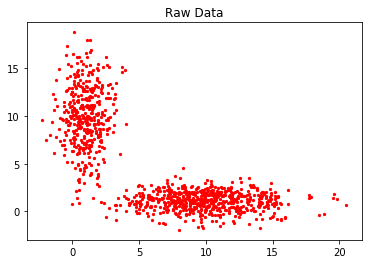

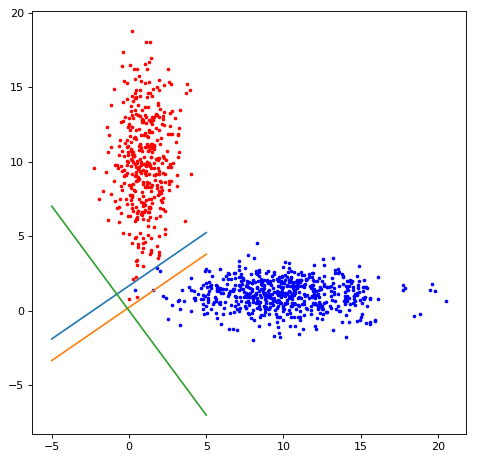

In [5]:

%matplotlib inline
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
sys.path.append("..")
from matplotlib import pyplot as plt


#计算w,b
def parameter(x1,x2,p1=0.5,p2=0.5):
    
    num1=x1.shape[1]
    num2=x2.shape[1]
    u1=np.zeros((x1.shape[0],1))
    u2=np.zeros((x2.shape[0],1))
    for i in range(num1):
        u1=u1+(x1[:,i]).reshape(x1.shape[0],1)
    for i in range(num2):
        u2=u2+(x2[:,i]).reshape(x2.shape[0],1)
    u1=(1/num1)*u1
    u2=(1/num2)*u2
    s1=np.dot((x1-u1),(x1-u1).T)
    s2=np.dot((x2-u2),(x2-u2).T)
    sw=s1+s2
    sb=np.dot((u1-u2),(u1-u2).T)
    ww=np.dot(np.linalg.inv(sw),(u1-u2))
    b1=(-1/2)*(np.dot((np.dot(((u1+u2).T),((1/(num1+num2))*np.linalg.inv(sw)))),(u1-u2)))+(1/(num1+num2))*np.log(p1/p2)
    b2=(-1/2)*(np.dot(ww.T,u1)+np.dot(ww.T,u2))
    return ww,b1,b2

#生成数据
x1=[[1,2,2],[1,2,0]]
x2=[[0,1,0],[0,2,1]]
x1=np.array(x1)
x2=np.array(x2)
ww,b1,b2= parameter(x1,x2)


#生成两类正态样本
def genexam():
    z = [[[1.0, 0], [0, 10.0]],[[10.0, 0], [0, 1.0]]]
    u=[[1.0, 10.0],[10.0, 1.0]]
    a=[0.4,0.6]
    x1=[]
    x2=[]
    for i in range(1000):  
        ui=np.random.multinomial(1,a,1)  #  按照给定的概率分布 决定 用哪个高斯分布生成样本
        ui=ui[0]
        if ui[0]==1:
            x1.append((np.random.multivariate_normal(u[0], z[0],1))[0]) #生成二维正态样本  
        if ui[1]==1:
            x2.append((np.random.multivariate_normal(u[1], z[1],1))[0])
    x1=(np.array(x1).T)
    x2=(np.array(x2).T)
    x3=np.hstack((x1,x2)).T
    return x1,x2,x3


x1_T,x2_T,x3_T=genexam()

# 原始数据散点图
def draw(xx3):
    plt.scatter(xx3[:, 0],xx3[:, 1], s=5, c='r')
    plt.title('Raw Data')
    plt.show()
#画决策面和法向量面
def draw2(xx1,xx2,w_T,b_T1,b_T2):
    fig = plt.figure(num=5, figsize=(7, 7),dpi=80) 
    ax1 = fig.add_subplot(1,1, 1)
    ax1.scatter(xx1[:, 0],xx1[:, 1], s=5, c='r')
    ax1.scatter(xx2[:, 0],xx2[:, 1], s=5, c='b')
    x = np.linspace(-5,5, 10)
    y = (-w_T[0]*x-b_T2)/w_T[1]
    x1 = np.linspace(-5,5,10)
    y1 = (w_T[1]*x)/w_T[0]
    x3 = np.linspace(-5,5,10)
    y3 = (-w_T[0]*x-b_T1)/w_T[1]
    ax1.plot(x, y[0])
    ax1.plot(x3, y3[0])
    ax1.plot(x1, y1)
    plt.show()
   
   
    
draw(x3_T)
w_T,b_T1,b_T2= parameter(x1_T,x2_T,0.4,0.6)
draw2(x1_T.T,x2_T.T,w_T,b_T1,b_T2)